Experiment - 2

Roll No: 20EC39002, 20EC39054

In [ ]:
class BMP_struct:
  # data structure for BMP file

  filename = ""
  #Header : 14 bytes
  signature = 'BM'                  # 2 bytes
  file_size = 0                     # 4 bytes
  reserved = 0                      # 4 bytes
  data_offset = 0                   # 4 bytes

  #BMP info Header : 40 bytes
  size = 0                          # 4 bytes
  width = 0                         # 4 bytes
  height = 0                        # 4 bytes
  planes = 0                        # 2 bytes
  bits_per_pixel = 0                # 2 bytes
  compression = 0                   # 4 bytes
  image_size = 0                    # 4 bytes
  x_pixel_per_M = 0                 # 4 bytes
  y_pixel_per_M = 0                 # 4 bytes
  colors_used = 0                   # 4 bytes
  important_colors = 0              # 4 bytes

  color_table = 0                   # 4*colors_used bytes

  pixel_data = 0                    # width*hight * bits_per_pixel/8 bytes

  #class meathod
  def __str__(self):
    print(self.filename, "file structure:")
    print("")
    print("Signature          : ", self.signature)
    print("File Size          : ", self.file_size/1024, "KB")
    print("Reserved           : ", self.reserved)
    print("Data Offset        : ", self.data_offset)
    print("Size               : ", self.size, "bytes")
    print("Width              : ", self.width, "px")
    print("Height             : ", self.height, "px")
    print("Planes             : ", self.planes)
    print("Bits Per Pixel     : ", self.bits_per_pixel)
    print("Compression        : ", self.compression)
    print("Image Size         : ", self.image_size/1024, "KB")
    print("X Pixel per Meter  : ", self.x_pixel_per_M)
    print("Y Pixel per Meter  : ", self.y_pixel_per_M)
    print("Colors Used        : ", self.colors_used)
    print("Important Colors   : ", self.important_colors)
    print("Color Table        : ", self.color_table)
    print("Pixel Data         : ", self.pixel_data)
    return ""



In [ ]:
def read_bmp(filename):
  # reads BMP file and returns its structure (BMP_struct)

  file = open(filename, "rb")
  data = bytearray(file.read())
  lb = list(data)
  file.close()
  if lb[0] != 66 or lb[1] != 77:
    print("Error: input is not an bmp file")
    return

  bmp = BMP_struct()
  bmp.filename = filename
  #header
  bmp.signature = chr(lb[0]) + chr(lb[1])
  bmp.file_size = ((lb[5]<<24)|(lb[4]<<16)|(lb[3]<<8)|lb[2])#2:5
  bmp.reserved = ((lb[9]<<24)|(lb[8]<<16)|(lb[7]<<8)|lb[6])#6:9
  bmp.data_offset = ((lb[13]<<24)|(lb[12]<<16)|(lb[11]<<8)|lb[10])#10:13

  #info header
  bmp.size = ((lb[17]<<24)|(lb[16]<<16)|(lb[15]<<8)|lb[14])#14:17
  bmp.width = ((lb[21]<<24)|(lb[20]<<16)|(lb[19]<<8)|lb[18])#18:21
  bmp.height = ((lb[25]<<24)|(lb[24]<<16)|(lb[23]<<8)|lb[22])#22:25
  bmp.planes = ((lb[27]<<8)|lb[26])#26:27
  bmp.bits_per_pixel = ((lb[29]<<8)|lb[28])#28:29
  bmp.compression = ((lb[33]<<24)|(lb[32]<<16)|(lb[31]<<8)|lb[30])#30:33
  bmp.image_size = ((lb[37]<<24)|(lb[36]<<16)|(lb[35]<<8)|lb[34])#34:37
  bmp.x_pixel_per_M = ((lb[41]<<24)|(lb[40]<<16)|(lb[39]<<8)|lb[38])#38:41
  bmp.y_pixel_per_M = ((lb[45]<<24)|(lb[44]<<16)|(lb[43]<<8)|lb[42])#42:45
  bmp.colors_used = ((lb[49]<<24)|(lb[48]<<16)|(lb[47]<<8)|lb[46])#46:49
  bmp.important_colors = ((lb[53]<<24)|(lb[52]<<16)|(lb[51]<<8)|lb[50])#50:53
  bmp.color_table = lb[54:4*pow(2, bmp.bits_per_pixel)+54]
  bmp.pixel_data = lb[bmp.data_offset:]

  return bmp



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
import math as m
import copy


def write_bmp(filename, bmp_head: BMP_struct, pixel_data, height, width, d_size=False):

  window_size = (5, 5)
  if d_size:
    # adaptive sizing
    window_size = (5*width/256, 5*height/256)
  fig, ax = plt.subplots(figsize = window_size)
  ax.set_axis_off()

  if (bmp_head.bits_per_pixel == 8):
    #use colormap
    color_list = bmp_head.color_table
    color_list = np.array(color_list)
    color_list = color_list.reshape(256, 4)
    color_list = np.delete(color_list, 3, 1)
    color_list = color_list/255
    color_list = np.fliplr(color_list)
    _8_bit_color_map = col.ListedColormap(color_list, name="custom", N=256)
    bitmap = np.array(pixel_data)
    bitmap = bitmap.reshape((height, width))
    bitmap = np.flipud(bitmap)
    ax.matshow(bitmap, cmap = _8_bit_color_map, vmin=0, vmax=255)
    plt.show()
    plt.imsave(filename, bitmap, cmap = _8_bit_color_map, format = 'bmp', vmin=0, vmax=255)

  if(bmp_head.bits_per_pixel == 24):
    #dont use colormap
    bitmap = np.array(pixel_data)
    bitmap = bitmap.reshape((height, width, 3))
    bitmap = np.flipud(bitmap)
    bitmap[:,:,[0, 2]] = bitmap[:,:,[2, 0]]
    ax.matshow(bitmap)
    plt.show()
    plt.imsave(filename, bitmap/255, format = 'bmp')

In [ ]:
def pix_matshow(filename, pixel_data, height, width, d_size=False):
  """
    plot pixel matrix with rgb values
    it flips image upside down
    and reverses R and B columns
  """
  window_size = (5, 5)
  if d_size:
    # adaptive sizing
    window_size = (5*width/256, 5*height/256)
  fig, ax = plt.subplots(figsize = window_size)
  ax.set_axis_off()

  bitmap = np.flipud(pixel_data)
  bitmap[:,:,[0, 2]] = bitmap[:,:,[2, 0]]
  ax.matshow(bitmap)
  plt.show()
  plt.imsave(filename, bitmap/255, format = 'bmp')

In [ ]:
# scale image without interpolation
def scale_image_none(bmp:BMP_struct, Sx, Sy):
  new_height = m.ceil(Sy*bmp.height)
  new_width = m.ceil(Sx*bmp.width)
  pixel_mat = copy.deepcopy(bmp.pixel_data);
  pixel_mat = np.array(pixel_mat)
  if bmp.bits_per_pixel == 8:
    new_mat_size = (new_height, new_width)
    pixel_mat = np.reshape(pixel_mat, (bmp.height, bmp.width))
  if bmp.bits_per_pixel == 24:
    new_mat_size = (new_height, new_width, 3)
    pixel_mat = np.reshape(pixel_mat, (bmp.height, bmp.width, 3))
  scaled_pixel_data = np.zeros(new_mat_size)
  for i in range(bmp.height):
    for j in range(bmp.width):
      scaled_pixel_data[int(i*Sy),int(j*Sx)] = pixel_mat[i,j]
  return scaled_pixel_data.astype('uint8'), new_height, new_width


In [ ]:
# scale image with nearest neighbour interpolation
def scale_image_nn(bmp:BMP_struct, Sx, Sy):
  new_height = m.ceil(Sy*bmp.height)
  new_width = m.ceil(Sx*bmp.width)
  pixel_mat = copy.deepcopy(bmp.pixel_data);
  pixel_mat = np.array(pixel_mat)
  if bmp.bits_per_pixel == 8:
    new_mat_size = (new_height, new_width)
    pixel_mat = np.reshape(pixel_mat, (bmp.height, bmp.width))
  if bmp.bits_per_pixel == 24:
    new_mat_size = (new_height, new_width, 3)
    pixel_mat = np.reshape(pixel_mat, (bmp.height, bmp.width, 3))
  scaled_pixel_data = np.zeros(new_mat_size)
  for i in range(new_height):
    for j in range(new_width):
      scaled_pixel_data[i,j] = pixel_mat[int(i/Sy),int(j/Sx)]
  return scaled_pixel_data.astype('uint8'), new_height, new_width


In [ ]:
# scale image with bilinear interpolation
def scale_image_bilinear(bmp:BMP_struct, Sx, Sy):
  new_height = m.floor(Sy*(bmp.height - 1) + 1)
  new_width = m.floor(Sx*(bmp.width - 1) + 1)
  pixel_mat = copy.deepcopy(bmp.pixel_data);
  pixel_mat = np.array(pixel_mat)

  if bmp.bits_per_pixel == 8:
    #color mapping
    color_list = bmp.color_table
    color_list = np.array(color_list)
    color_list = color_list.reshape(256, 4)
    color_list = np.delete(color_list, 3, 1)
    pixel_mat = np.reshape(pixel_mat, (bmp.height, bmp.width))
    temp_mat = np.zeros((bmp.height, bmp.width, 3))
    for i in range(bmp.height):
      for j in range(bmp.width):
        temp_mat[i,j] = color_list[pixel_mat[i,j]]
    pixel_mat = temp_mat

  if bmp.bits_per_pixel == 24:
    pixel_mat = np.reshape(pixel_mat, (bmp.height, bmp.width, 3))
  scaled_pixel_data = np.zeros((new_height, new_width, 3))


  for i in range(new_height):
    for j in range(new_width):
      x = j/Sx
      y = i/Sy
      x1 = m.floor(x)
      y1 = m.floor(y)
      if x+1>=bmp.width:
        x1-=1
      if y+1>=bmp.height:
        y1-=1
      x2 = x1+1
      y2 = y1+1
      f_i_j = (x2-x)*(y2-y)*(pixel_mat[y1, x1]) + (x-x1)*(y2-y)*(pixel_mat[y1, x2]) + (x2-x)*(y-y1)*(pixel_mat[y2, x1]) + (x-x1)*(y-y1)*(pixel_mat[y2, x2])
      scaled_pixel_data[i,j] = f_i_j

  return scaled_pixel_data.astype('uint8'), new_height, new_width

Input: Image file

In [ ]:
# Input: image file
image_in = read_bmp('lena_colored_256.bmp')

Input: Scaling factors along x-axis and y-axis respectively $S_x$ and $S_y$

In [ ]:
Sx = 0.5
Sy = 2

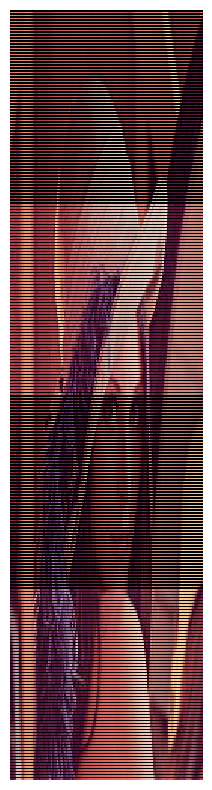

<Figure size 640x480 with 0 Axes>

In [ ]:
# Scaled image with no interpolation
image_out, height, width = scale_image_none(image_in, Sx, Sy)
write_bmp("scaled_img_without_interpolation.bmp", image_in, image_out, height, width, True)

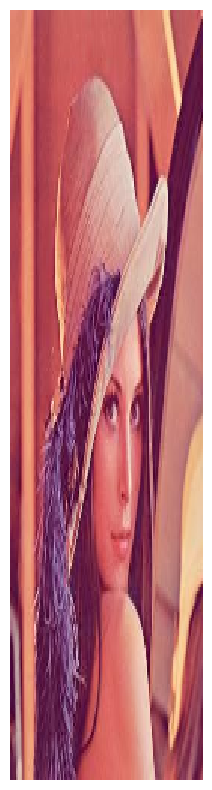

<Figure size 640x480 with 0 Axes>

In [ ]:
# Scaled image using nearest neighbour interpolation
image_out, height, width = scale_image_nn(image_in, Sx, Sy)
write_bmp("scaled_img_nearest_neighbour.bmp", image_in, image_out, height, width, True)

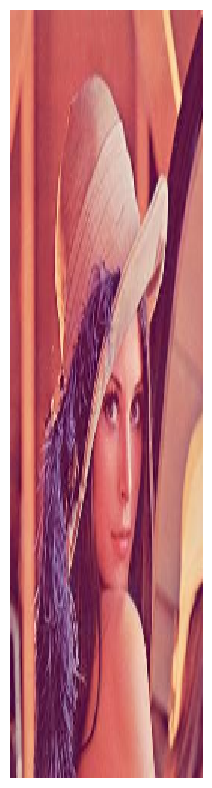

In [ ]:
# Scaled image using bilinear interpolation
image_out, height, width = scale_image_bilinear(image_in, Sx, Sy)
pix_matshow("scaled_img_bilinear.bmp",image_out, height, width, True)

In [ ]:
"""
Rotation function: anti clock wise

  x = u cosθ − v sin θ
  y = u sin θ + v cosθ

  =>
  u = x cosθ + y sinθ
  v = y cosθ - x sinθ

"""

# Rotate image without interpolation
def rotate_image_none(bmp:BMP_struct, theta):
  d = m.sqrt(pow(bmp.height,2)+pow(bmp.width,2))
  new_height = m.ceil(d)
  new_width = m.ceil(d)
  pixel_mat = copy.deepcopy(bmp.pixel_data);
  pixel_mat = np.array(pixel_mat)
  if bmp.bits_per_pixel == 8:
    pixel_mat = np.reshape(pixel_mat, (bmp.height, bmp.width))
    rotated_pixel_data = np.zeros((new_height, new_width))
  else:
    pixel_mat = np.reshape(pixel_mat, (bmp.height, bmp.width,3))
    rotated_pixel_data = np.zeros((new_height, new_width,3))

  for i in range(-int(bmp.height/2), int(bmp.height/2)):
    for j in range(-int(bmp.width/2), int(bmp.width/2)):
      x = int(j*m.cos(theta)) - int(i*m.sin(theta)) + int(new_width/2)
      y = int(j*m.sin(theta)) + int(i*m.cos(theta)) + int(new_height/2)
      rotated_pixel_data[y, x]  = pixel_mat[i+int(bmp.height/2), j+int(bmp.width/2)]

  return rotated_pixel_data.astype('uint8'), new_height, new_width

In [ ]:
# Rotate image with Nearest neighbour interpolation
def rotate_image_nn(bmp:BMP_struct, theta):
  d = m.sqrt(pow(bmp.height,2)+pow(bmp.width,2))
  new_height = m.ceil(d)
  new_width = m.ceil(d)
  pixel_mat = copy.deepcopy(bmp.pixel_data);
  pixel_mat = np.array(pixel_mat)
  if bmp.bits_per_pixel == 8:
    pixel_mat = np.reshape(pixel_mat, (bmp.height, bmp.width))
    rotated_pixel_data = np.zeros((new_height, new_width))
  else:
    pixel_mat = np.reshape(pixel_mat, (bmp.height, bmp.width,3))
    rotated_pixel_data = np.zeros((new_height, new_width,3))

  for i in range(-int(new_height/2), int(new_height/2)):
    for j in range(-int(new_width/2), int(new_width/2)):
      u = int(j*m.cos(theta)) + int(i*m.sin(theta)) + int(bmp.width/2)
      v = int(i*m.cos(theta)) - int(j*m.sin(theta)) + int(bmp.height/2)
      if v>=bmp.height or v<0 or u>=bmp.width or u<0:
        rotated_pixel_data[(i+int(new_height/2)), (j+int(new_width/2))]  = 0
      else:
        rotated_pixel_data[(i+int(new_height/2)), (j+int(new_width/2))]  = pixel_mat[v, u]

  return rotated_pixel_data.astype('uint8'), new_height, new_width

In [ ]:
# Rotate image with Bilinear interpolation
def rotate_image_bilinear(bmp:BMP_struct, theta):

  d = m.sqrt(pow(bmp.height,2)+pow(bmp.width,2))
  new_height = m.ceil(d)
  new_width = m.ceil(d)
  pixel_mat = copy.deepcopy(bmp.pixel_data);
  pixel_mat = np.array(pixel_mat)
  if bmp.bits_per_pixel == 8:
   #color mapping
    color_list = bmp.color_table
    color_list = np.array(color_list)
    color_list = color_list.reshape(256, 4)
    color_list = np.delete(color_list, 3, 1)
    pixel_mat = np.reshape(pixel_mat, (bmp.height, bmp.width))
    temp_mat = np.zeros((bmp.height, bmp.width, 3))
    for i in range(bmp.height):
      for j in range(bmp.width):
        temp_mat[i,j] = color_list[pixel_mat[i,j]]
    pixel_mat = temp_mat
  else:
    pixel_mat = np.reshape(pixel_mat, (bmp.height, bmp.width,3))
  rotated_pixel_data = np.zeros((new_height, new_width,3))

  for i in range(-int(new_height/2), int(new_height/2)):
    for j in range(-int(new_width/2), int(new_width/2)):
      u = j*m.cos(theta) + i*m.sin(theta) + int(bmp.width/2)
      v = i*m.cos(theta) - j*m.sin(theta) + int(bmp.height/2)
      x1 = m.floor(u)
      y1 = m.floor(v)
      if u+1>=bmp.width:
        x1-=1
      if v+1>=bmp.height:
        y1-=1
      x2 = x1+1
      y2 = y1+1
      if v>=bmp.height or v<0 or u>=bmp.width or u<0:
        rotated_pixel_data[(i+int(new_height/2)), (j+int(new_width/2))]  = 0
      else:
        f_i_j = (x2-u)*(y2-v)*(pixel_mat[y1, x1]) + (u-x1)*(y2-v)*(pixel_mat[y1, x2]) + (x2-u)*(v-y1)*(pixel_mat[y2, x1]) + (u-x1)*(v-y1)*(pixel_mat[y2, x2])
        rotated_pixel_data[(i+int(new_height/2)), (j+int(new_width/2))]  = f_i_j

  return rotated_pixel_data.astype('uint8'), new_height, new_width

Input: angle of rotation theta ($\theta$)

In [ ]:
theta = 2*(m.pi/3)     # Input: angle of rotation theta

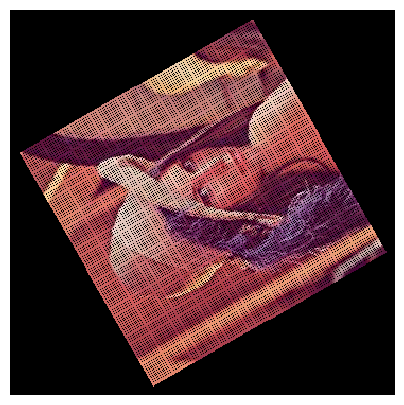

<Figure size 640x480 with 0 Axes>

In [ ]:
# Rotated image by angle theta, without any interpolation
image_out, height, width = rotate_image_none(image_in, theta)
write_bmp("rotated_no_interpolation.bmp", image_in, image_out, height, width)

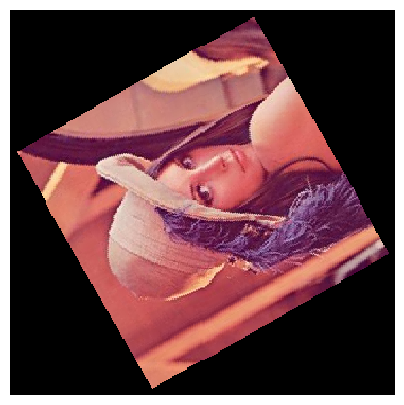

<Figure size 640x480 with 0 Axes>

In [ ]:
# Rotated image by angle theta by using nearest neighbour interpolation
image_out, height, width = rotate_image_nn(image_in, theta)
write_bmp("rotated_nearest_neighbour.bmp", image_in, image_out, height, width)

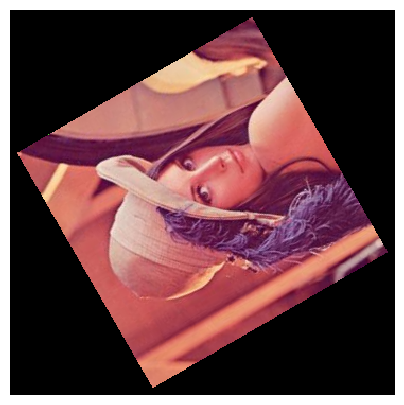

In [ ]:
# Rotated image by angle theta by using bilinear interpolation
image_out, height, width = rotate_image_bilinear(image_in, theta)
pix_matshow("rotated_bilinear.bmp",image_out, height, width)